In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/금지된 수공/last_avg10.xlsx')
data

,logTime,창원권_반송(정) 침전수 탁도,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 알칼리도,창원권_반송(정) 원수 전기전도도,창원권_반송(정) 도수 원수유입유량,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입량,창원권_반송(정) PACS 투입률 ppm,탁도24avg
0,2013-01-01 01:00:00,0.0588,7.7017,99.5002,314.8864,2425.8030,7.6528,2.5044,47.1580,19.4402,0.000000
1,2013-01-01 02:00:00,0.0304,7.2569,99.5422,316.8224,2423.7048,7.6505,2.4357,46.6468,19.2461,7.701700
2,2013-01-01 03:00:00,0.0438,6.9190,99.5546,318.1849,2441.6343,7.6477,2.6493,46.6316,19.0985,7.479300
3,2013-01-01 04:00:00,0.0926,6.9069,99.5257,319.0541,2442.0156,7.6480,2.3842,46.9673,19.2330,7.292533
4,2013-01-01 05:00:00,0.0739,6.7461,99.5107,320.2157,2435.9121,7.6477,2.4758,47.6310,19.5537,7.196125
...,...,...,...,...,...,...,...,...,...,...,...
82217,2023-08-30 18:00:00,0.7781,31.1396,40.1730,161.5760,1810.8750,6.6708,27.5118,183.4000,101.2770,30.531560
82218,2023-08-30 19:00:00,0.7995,31.1010,39.2997,156.3875,1806.8438,6.6654,27.5492,183.4500,101.5306,30.488960
82219,2023-08-30 20:00:00,0.7872,30.8281,40.6888,158.5146,1794.8958,6.6617,27.5372,157.9750,88.0135,30.561560
82220,2023-08-30 21:00:00,0.8006,30.5719,40.3495,158.1531,1288.6146,6.6628,27.5340,126.4750,98.1480,30.446770


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82222 entries, 0 to 82221
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   logTime                 82222 non-null  datetime64[ns]
 1   창원권_반송(정) 침전수 탁도        82222 non-null  float64       
 2   창원권_반송(정) 원수 탁도         82222 non-null  float64       
 3   창원권_반송(정) 원수 알칼리도       82222 non-null  float64       
 4   창원권_반송(정) 원수 전기전도도      82222 non-null  float64       
 5   창원권_반송(정) 도수 원수유입유량     82222 non-null  float64       
 6   창원권_반송(정) 원수 pH         82222 non-null  float64       
 7   창원권_반송(정) 원수 온도         82222 non-null  float64       
 8   창원권_반송(정) PACS 투입량      82222 non-null  float64       
 9   창원권_반송(정) PACS 투입률 ppm  82222 non-null  float64       
 10  탁도24avg                 82220 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 6.9 MB


In [ ]:
data['투입률1H_Shift'] = data['창원권_반송(정) PACS 투입률 ppm'].shift(-1)
data.fillna(0,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82222 entries, 0 to 82221
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   logTime                 82222 non-null  datetime64[ns]
 1   창원권_반송(정) 침전수 탁도        82222 non-null  float64       
 2   창원권_반송(정) 원수 탁도         82222 non-null  float64       
 3   창원권_반송(정) 원수 알칼리도       82222 non-null  float64       
 4   창원권_반송(정) 원수 전기전도도      82222 non-null  float64       
 5   창원권_반송(정) 도수 원수유입유량     82222 non-null  float64       
 6   창원권_반송(정) 원수 pH         82222 non-null  float64       
 7   창원권_반송(정) 원수 온도         82222 non-null  float64       
 8   창원권_반송(정) PACS 투입량      82222 non-null  float64       
 9   창원권_반송(정) PACS 투입률 ppm  82222 non-null  float64       
 10  탁도24avg                 82222 non-null  float64       
 11  투입률1H_Shift             82222 non-null  float64       
dtypes: datetime64[ns](1), float64(11)
memory usage

In [ ]:
# 24:00형식을 다음날 00:00시로 변경 후 datetime으로 변경
def cvt_24_to_00(ori_time):
    if isinstance(ori_time, str):
        date_str, time_str = ori_time.split(" ")

        if time_str == "24:00":
            date_obj = pd.to_datetime(date_str, format='%Y-%m-%d')
            date_obj += pd.Timedelta(days=1)
            return date_obj.strftime('%Y-%m-%d') + " 00:00"
        else:
            return ori_time
    else:
        return ori_time
data['logTime'] = data['logTime'].apply(cvt_24_to_00)

In [ ]:
# 년/월/일/시 칼럼 생성
data['year'] = data['logTime'].dt.year # 연도
data['month'] = data['logTime'].dt.month # 월
data['day'] = data['logTime'].dt.day # 일
data['hour']=data['logTime'].dt.hour # 시

In [ ]:
data.corr()

<ipython-input-121-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,창원권_반송(정) 침전수 탁도,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 알칼리도,창원권_반송(정) 원수 전기전도도,창원권_반송(정) 도수 원수유입유량,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입량,창원권_반송(정) PACS 투입률 ppm,탁도24avg,투입률1H_Shift,year,month,day,hour
창원권_반송(정) 침전수 탁도,1.000000,0.309772,-0.137477,-0.110733,0.017126,-0.201601,0.259400,0.113755,0.138158,0.325424,0.139347,0.459802,0.189340,-0.007712,0.027585
창원권_반송(정) 원수 탁도,0.309772,1.000000,-0.241983,-0.427668,0.049688,-0.323826,0.215822,0.454203,0.545835,0.890823,0.545690,-0.054198,0.135617,-0.022931,0.018441
창원권_반송(정) 원수 알칼리도,-0.137477,-0.241983,1.000000,0.374059,0.005260,0.175344,-0.263613,-0.126303,-0.169181,-0.260450,-0.169164,0.209605,-0.072513,-0.017174,0.000409
창원권_반송(정) 원수 전기전도도,-0.110733,-0.427668,0.374059,1.000000,-0.019154,0.320957,-0.607459,-0.431321,-0.536373,-0.455472,-0.536035,0.339092,-0.366326,0.003781,-0.000792
창원권_반송(정) 도수 원수유입유량,0.017126,0.049688,0.005260,-0.019154,1.000000,0.053918,-0.037059,0.591840,0.037332,0.032016,0.036191,-0.097362,-0.019127,0.042898,0.102945
창원권_반송(정) 원수 pH,-0.201601,-0.323826,0.175344,0.320957,0.053918,1.000000,-0.362079,-0.171014,-0.264189,-0.342263,-0.263757,-0.096978,-0.211002,0.040706,-0.004612
창원권_반송(정) 원수 온도,0.259400,0.215822,-0.263613,-0.607459,-0.037059,-0.362079,1.000000,0.302122,0.404825,0.229928,0.405015,0.048323,0.400433,0.031096,0.001482
창원권_반송(정) PACS 투입량,0.113755,0.454203,-0.126303,-0.431321,0.591840,-0.171014,0.302122,1.000000,0.801406,0.464648,0.786531,-0.222774,0.250362,0.016117,0.060288
창원권_반송(정) PACS 투입률 ppm,0.138158,0.545835,-0.169181,-0.536373,0.037332,-0.264189,0.404825,0.801406,1.000000,0.573753,0.977450,-0.206888,0.330630,-0.008599,-0.001565
탁도24avg,0.325424,0.890823,-0.260450,-0.455472,0.032016,-0.342263,0.229928,0.464648,0.573753,1.000000,0.571358,-0.057318,0.145554,-0.021855,0.014161


In [ ]:
data.drop('창원권_반송(정) PACS 투입량',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)
data.drop('hour',axis=1,inplace=True)

In [ ]:
df_2023_8= data[(data['logTime'].dt.year == 2023) & (data['logTime'].dt.month == 8)]
data = data[~((data['logTime'].dt.year == 2023) & (data['logTime'].dt.month == 8))]
data

,logTime,창원권_반송(정) 침전수 탁도,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 알칼리도,창원권_반송(정) 원수 전기전도도,창원권_반송(정) 도수 원수유입유량,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입률 ppm,탁도24avg,투입률1H_Shift,year,month
0,2013-01-01 01:00:00,0.0588,7.7017,99.5002,314.8864,2425.8030,7.6528,2.5044,19.4402,0.000000,19.2461,2013,1
1,2013-01-01 02:00:00,0.0304,7.2569,99.5422,316.8224,2423.7048,7.6505,2.4357,19.2461,7.701700,19.0985,2013,1
2,2013-01-01 03:00:00,0.0438,6.9190,99.5546,318.1849,2441.6343,7.6477,2.6493,19.0985,7.479300,19.2330,2013,1
3,2013-01-01 04:00:00,0.0926,6.9069,99.5257,319.0541,2442.0156,7.6480,2.3842,19.2330,7.292533,19.5537,2013,1
4,2013-01-01 05:00:00,0.0739,6.7461,99.5107,320.2157,2435.9121,7.6477,2.4758,19.5537,7.196125,19.5454,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81546,2023-07-31 19:00:00,0.4564,17.8719,37.2630,186.8729,1257.6563,7.2189,28.0439,35.2243,18.734580,35.1284,2023,7
81547,2023-07-31 20:00:00,0.4769,16.9479,37.7945,187.4281,1255.3958,7.2367,28.0524,35.1284,18.588230,25.0837,2023,7
81548,2023-07-31 21:00:00,0.4513,16.0000,37.8672,187.6979,1893.6563,7.2499,28.0417,25.0837,18.384370,34.8493,2023,7
81549,2023-07-31 22:00:00,0.4367,16.0271,37.8137,187.6229,1261.1458,7.2341,28.0464,34.8493,18.127910,34.8367,2023,7


In [ ]:
data.drop('logTime', axis=1, inplace=True)
df_2023_8.drop('logTime',axis=1, inplace=True)

<ipython-input-11-9cfc352541a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('logTime', axis=1, inplace=True)
<ipython-input-11-9cfc352541a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_8.drop('logTime',axis=1, inplace=True)


In [ ]:
X = data.drop('창원권_반송(정) PACS 투입률 ppm',axis=1)
y = data['창원권_반송(정) PACS 투입률 ppm']
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [ ]:
import numpy as np
def calculate_sample_weights(X_data, column_name, threshold, weight_for_high):
    """특정 열의 값이 임계값 이상인 샘플에 더 높은 가중치를 부여합니다."""
    return np.where(X_data[column_name] >= threshold, weight_for_high, 1)

# '원수 탁도'가 70 이상인 샘플에 부여할 가중치 설정
high_turbidity_threshold = 70  # 탁도가 높다고 간주되는 임계값
weight_for_high = 3  # 고탁도 샘플에 부여할 가중치

# 훈련 데이터에 대한 샘플 가중치 계산
sample_weights = calculate_sample_weights(X_train, '창원권_반송(정) 원수 탁도', high_turbidity_threshold, weight_for_high)

In [ ]:
X_test = df_2023_8.drop('창원권_반송(정) PACS 투입률 ppm',axis=1)
y_test = df_2023_8['창원권_반송(정) PACS 투입률 ppm']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-4.32372810e-01, -1.63156723e-01, -4.76946508e-02, ...,
        -8.76148254e-01,  6.44355852e-01, -9.61569968e-01],
       [-6.36002058e-01, -1.64682916e-01, -6.59249929e-01, ...,
         9.60614573e-01,  1.67363824e-02,  7.82426551e-01],
       [-8.47072907e-01,  8.38079999e-01,  7.41303528e-01, ...,
         1.61835144e+00, -6.10883088e-01,  1.65442481e+00],
       ...,
       [-7.17934434e-02,  5.85001703e-01, -7.95023744e-01, ...,
         5.10226032e-01,  1.67363824e-02,  7.82426551e-01],
       [-1.31454072e+00, -6.26356371e-01,  2.38704708e+00, ...,
         1.04632436e+00, -9.24692822e-01,  1.07309264e+00],
       [ 1.94605185e-03, -5.55678072e-02,  8.89687732e-02, ...,
        -4.14929923e-01,  6.44355852e-01, -6.70903881e-01]])

In [ ]:
X_test[:3]

array([[ 0.8013382 ,  0.35375387, -1.1052603 , -1.4447873 , -2.11803863,
        -0.98042073,  1.29221085, -1.02758665,  0.53104653,  0.53639483,
         0.49102958, -1.66935272, -1.66265543],
       [ 1.01045538,  0.2833551 , -1.12378188, -1.44574166, -2.11455404,
        -0.99906026,  1.28809331, -1.01046705,  0.5074237 ,  2.65984106,
         0.49102958, -1.66935272, -1.51831566],
       [ 1.21009799,  0.29839091, -1.13826686, -1.44961146, -0.93797868,
        -1.01148662,  1.28722206,  1.02413116,  0.4734888 , -1.20598064,
         0.49102958, -1.66935272, -1.3739759 ]])

In [ ]:
import math
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="elu",input_shape=X_train.shape[1:],kernel_initializer="he_normal"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(300, activation = "elu",kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100,activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1)
])
n_epochs = 100

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss = "mean_squared_error", optimizer = optimizer)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid), sample_weight=sample_weights, callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

print(mse_test)

Epoch 1/100
1912/1912 [==============================] - 15s 7ms/step - loss: 20.9629 - val_loss: 4.6138
Epoch 2/100
1912/1912 [==============================] - 13s 7ms/step - loss: 10.5237 - val_loss: 4.3751
Epoch 3/100
1912/1912 [==============================] - 14s 8ms/step - loss: 9.7843 - val_loss: 4.2511
Epoch 4/100
1912/1912 [==============================] - 15s 8ms/step - loss: 9.2471 - val_loss: 4.0830
Epoch 5/100
1912/1912 [==============================] - 14s 8ms/step - loss: 8.7551 - val_loss: 4.1946
Epoch 6/100
1912/1912 [==============================] - 14s 7ms/step - loss: 8.6713 - val_loss: 6.3655
Epoch 7/100
1912/1912 [==============================] - 14s 7ms/step - loss: 8.3498 - val_loss: 4.2695
Epoch 8/100
1912/1912 [==============================] - 14s 7ms/step - loss: 8.2512 - val_loss: 4.4043
Epoch 9/100
1912/1912 [==============================] - 13s 7ms/step - loss: 8.0567 - val_loss: 3.8351
Epoch 10/100
1912/1912 [==============================] - 14s 

In [ ]:
X_test2 = X_test[:-12]
y_test2 = y_test[:-12]
y_pred2=model.predict(X_test2)
model.evaluate(X_test2, y_test2)

21/21 [==============================] - 0s 2ms/step - loss: 64.5857


64.58570098876953

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test2, y_pred2)

5.437068876594693

In [ ]:
len(y_pred)

671

In [ ]:
y_test

81551     34.6258
81552     35.0756
81553     57.5337
81554     16.6478
81555     35.0475
           ...   
82217    101.2770
82218    101.5306
82219     88.0135
82220     98.1480
82221    100.6292
Name: 창원권_반송(정) PACS 투입률 ppm, Length: 671, dtype: float64

In [ ]:
X_train

array([[-0.2391768 , -0.44032571,  0.92065548, ..., -0.96703628,
        -0.07980852, -0.93994182],
       [-0.02607596,  1.12129531,  0.24591933, ...,  1.36738046,
         0.83058479,  1.08044023],
       [ 0.34280428,  0.42272298, -1.19201607, ...,  1.07557837,
         1.7409781 , -0.93994182],
       ...,
       [-0.22636377, -0.50104685,  1.39447534, ..., -1.55064047,
        -1.104001  , -1.37288083],
       [ 1.05493872, -0.35821035,  0.09915242, ...,  1.36738046,
         0.83058479,  0.64750122],
       [-0.05709697, -0.49057307,  1.21887152, ..., -1.55064047,
         0.4891873 ,  1.08044023]])

In [ ]:
for i in range(len(y_pred)):
  print(y_pred[i], y_test[81551+i], y_pred[i]-y_test[81551+i])

[36.259605] 34.6258 [1.6338043]
[44.152695] 35.0756 [9.077095]
[33.42257] 57.5337 [-24.11113]
[35.61798] 16.6478 [18.97018]
[36.180077] 35.0475 [1.132576]
[40.725784] 35.1849 [5.540886]
[36.861557] 40.4625 [-3.6009445]
[35.503136] 35.87 [-0.36686325]
[35.353893] 34.834 [0.51989365]
[35.92885] 34.7856 [1.1432495]
[35.92099] 35.12 [0.80099106]
[35.708214] 35.017 [0.6912155]
[34.436928] 34.7816 [-0.34467316]
[35.628807] 33.5868 [2.0420074]
[35.692722] 34.6341 [1.0586205]
[36.092827] 34.7037 [1.3891258]
[35.987526] 35.0966 [0.89092636]
[36.182404] 35.0812 [1.1012039]
[36.019905] 35.2801 [0.7398033]
[35.623898] 35.1229 [0.50099945]
[29.779015] 34.682 [-4.9029846]
[35.049126] 22.7961 [12.253025]
[35.848404] 34.3446 [1.5038033]
[48.244644] 34.9545 [13.290146]
[36.1047] 49.9523 [-13.847603]
[42.78952] 35.0565 [7.733021]
[26.065567] 60.4955 [-34.42993]
[32.93975] 25.1417 [7.79805]
[35.42354] 32.7144 [2.709137]
[43.86325] 34.6238 [9.239452]
[41.60855] 48.3761 [-6.7675476]
[36.428963] 41.9101 [-5

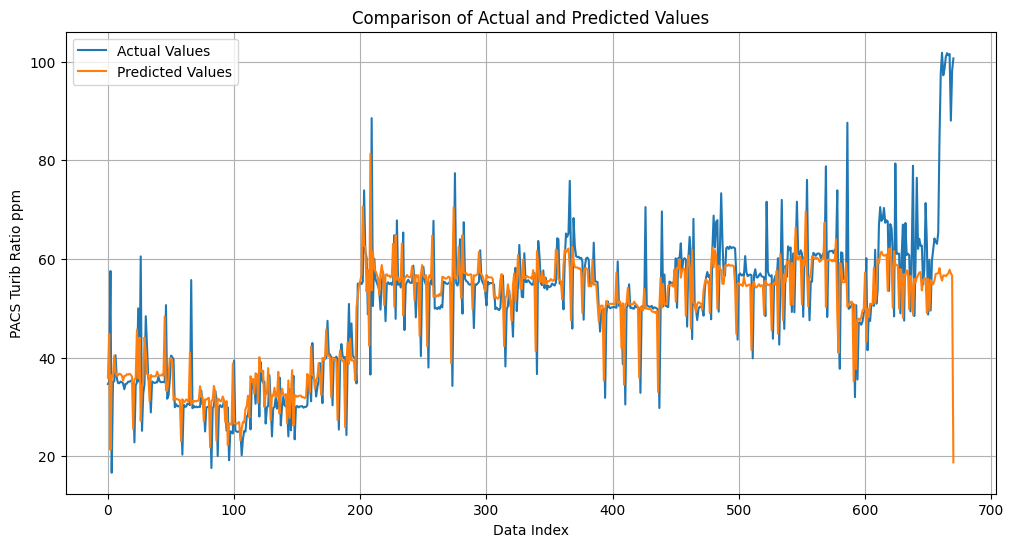

In [ ]:
# 실제값과 예측값의 line plot 그리기
plt.figure(figsize=(12, 6))
# plt.xlim(0, 24)
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.xlabel('Data Index')
plt.ylabel('PACS Turib Ratio ppm')
plt.grid(True)
plt.show()

# 침전지 탁도 예측

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/성공적인 수자원/침전지탁도예측데이터.csv')
df

,logTime,창원권_반송(정) 침전수 탁도,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 알칼리도,창원권_반송(정) 원수 전기전도도,창원권_반송(정) 도수 원수유입유량,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입량,창원권_반송(정) PACS 투입률 ppm,탁도24avg
0,2013.1.1 1:00,0.0588,7.7017,99.5002,314.8864,2425.8030,7.6528,2.5044,47.1580,19.4402,6.7605
1,2013.1.1 2:00,0.0304,7.2569,99.5422,316.8224,2423.7048,7.6505,2.4357,46.6468,19.2461,6.7412
2,2013.1.1 3:00,0.0438,6.9190,99.5546,318.1849,2441.6343,7.6477,2.6493,46.6316,19.0985,6.7244
3,2013.1.1 4:00,0.0926,6.9069,99.5257,319.0541,2442.0156,7.6480,2.3842,46.9673,19.2330,6.6857
4,2013.1.1 5:00,0.0739,6.7461,99.5107,320.2157,2435.9121,7.6477,2.4758,47.6310,19.5537,6.6408
...,...,...,...,...,...,...,...,...,...,...,...
84728,2023.8.30 18:00,0.7781,31.1396,40.1730,161.5760,1810.8750,6.6708,27.5118,183.4000,101.2770,31.2272
84729,2023.8.30 19:00,0.7995,31.1010,39.2997,156.3875,1806.8438,6.6654,27.5492,183.4500,101.5306,31.0510
84730,2023.8.30 20:00,0.7872,30.8281,40.6888,158.5146,1794.8958,6.6617,27.5372,157.9750,88.0135,30.9098
84731,2023.8.30 21:00,0.8006,30.5719,40.3495,158.1531,1288.6146,6.6628,27.5340,126.4750,98.1480,30.7147


In [ ]:
df['logTime']=pd.to_datetime(df['logTime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84733 entries, 0 to 84732
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   logTime                 84733 non-null  datetime64[ns]
 1   창원권_반송(정) 침전수 탁도        84733 non-null  float64       
 2   창원권_반송(정) 원수 탁도         84733 non-null  float64       
 3   창원권_반송(정) 원수 알칼리도       84733 non-null  float64       
 4   창원권_반송(정) 원수 전기전도도      84733 non-null  float64       
 5   창원권_반송(정) 도수 원수유입유량     84733 non-null  float64       
 6   창원권_반송(정) 원수 pH         84733 non-null  float64       
 7   창원권_반송(정) 원수 온도         84733 non-null  float64       
 8   창원권_반송(정) PACS 투입량      84733 non-null  float64       
 9   창원권_반송(정) PACS 투입률 ppm  84733 non-null  float64       
 10  탁도24avg                 84733 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 7.1 MB


In [ ]:
df['투입률1H_Shift'] = df['창원권_반송(정) PACS 투입률 ppm'].shift(-1)
df.fillna(0,inplace=True)

In [ ]:
df['year'] = df['logTime'].dt.year # 연도
df['month'] = df['logTime'].dt.month # 월
df['day'] = df['logTime'].dt.day # 일
df['hour']=df['logTime'].dt.hour # 시

In [ ]:
df.drop('day',axis=1,inplace=True)
df.drop('hour',axis=1,inplace=True)
df.drop('창원권_반송(정) PACS 투입량',axis=1,inplace=True)

In [ ]:
df_1 = df.drop('창원권_반송(정) 원수 알칼리도',axis=1)
df_1 = df_1.drop('창원권_반송(정) 원수 전기전도도',axis=1)
df_1 = df_1.drop('창원권_반송(정) 도수 원수유입유량',axis=1)
df_1 = df_1.drop('투입률1H_Shift',axis=1)
df_2 = df_1.drop('창원권_반송(정) 원수 탁도',axis=1)
df_2 = df_2.drop('year',axis=1)
df_2 = df_2.drop('month',axis=1)
df_2 = df_2.drop('창원권_반송(정) 원수 pH',axis=1)
df_2 = df_2.drop('창원권_반송(정) 원수 온도',axis=1)
df_2 = df_2.drop('탁도24avg', axis=1)

In [ ]:
df_1.drop('logTime',axis=1)
df_2.drop('logTime', axis=1)

In [ ]:
df_2.corr()

<ipython-input-138-2f9b2efe1c6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_2.corr()


,창원권_반송(정) 침전수 탁도,창원권_반송(정) PACS 투입률 ppm
창원권_반송(정) 침전수 탁도,1.000000,0.134971
창원권_반송(정) PACS 투입률 ppm,0.134971,1.000000


In [ ]:
df.corr()

<ipython-input-130-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,창원권_반송(정) 침전수 탁도,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 알칼리도,창원권_반송(정) 원수 전기전도도,창원권_반송(정) 도수 원수유입유량,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입률 ppm,탁도24avg,투입률1H_Shift,year,month
창원권_반송(정) 침전수 탁도,1.000000,0.305280,-0.063311,-0.109104,0.017634,-0.202002,0.265401,0.134971,0.323886,0.136190,0.448990,0.193087
창원권_반송(정) 원수 탁도,0.305280,1.000000,-0.197095,-0.426522,0.051698,-0.321740,0.217278,0.541166,0.928319,0.541058,-0.050210,0.135470
창원권_반송(정) 원수 알칼리도,-0.063311,-0.197095,1.000000,0.334547,-0.001480,0.114190,-0.170282,-0.148568,-0.218033,-0.148491,0.246513,-0.029351
창원권_반송(정) 원수 전기전도도,-0.109104,-0.426522,0.334547,1.000000,-0.018075,0.318034,-0.598850,-0.533333,-0.468899,-0.533005,0.335435,-0.362724
창원권_반송(정) 도수 원수유입유량,0.017634,0.051698,-0.001480,-0.018075,1.000000,0.056957,-0.043683,0.033845,0.038664,0.032819,-0.098928,-0.023610
창원권_반송(정) 원수 pH,-0.202002,-0.321740,0.114190,0.318034,0.056957,1.000000,-0.373450,-0.257251,-0.350860,-0.256812,-0.111503,-0.222815
창원권_반송(정) 원수 온도,0.265401,0.217278,-0.170282,-0.598850,-0.043683,-0.373450,1.000000,0.401853,0.241479,0.402036,0.072807,0.409163
창원권_반송(정) PACS 투입률 ppm,0.134971,0.541166,-0.148568,-0.533333,0.033845,-0.257251,0.401853,1.000000,0.586326,0.977832,-0.204130,0.326626
탁도24avg,0.323886,0.928319,-0.218033,-0.468899,0.038664,-0.350860,0.241479,0.586326,1.000000,0.586408,-0.055733,0.150542
투입률1H_Shift,0.136190,0.541058,-0.148491,-0.533005,0.032819,-0.256812,0.402036,0.977832,0.586408,1.000000,-0.204175,0.326428


위에는 기본
아래는 ㄹㅇ주요인자, 응집제 주입률만

In [ ]:
df_202308= df[(df['logTime'].dt.year == 2023) & (df['logTime'].dt.month == 8)]
train_df = df[~((df['logTime'].dt.year == 2023) & (df['logTime'].dt.month == 8))]
train_df

,logTime,창원권_반송(정) 침전수 탁도,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 알칼리도,창원권_반송(정) 원수 전기전도도,창원권_반송(정) 도수 원수유입유량,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입률 ppm,탁도24avg,투입률1H_Shift,year,month
0,2013-01-01 01:00:00,0.0588,7.7017,99.5002,314.8864,2425.8030,7.6528,2.5044,19.4402,6.7605,19.2461,2013,1
1,2013-01-01 02:00:00,0.0304,7.2569,99.5422,316.8224,2423.7048,7.6505,2.4357,19.2461,6.7412,19.0985,2013,1
2,2013-01-01 03:00:00,0.0438,6.9190,99.5546,318.1849,2441.6343,7.6477,2.6493,19.0985,6.7244,19.2330,2013,1
3,2013-01-01 04:00:00,0.0926,6.9069,99.5257,319.0541,2442.0156,7.6480,2.3842,19.2330,6.6857,19.5537,2013,1
4,2013-01-01 05:00:00,0.0739,6.7461,99.5107,320.2157,2435.9121,7.6477,2.4758,19.5537,6.6408,19.5454,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84046,2023-07-31 19:00:00,0.4564,17.8719,37.2630,186.8729,1257.6563,7.2189,28.0439,35.2243,18.4849,35.1284,2023,7
84047,2023-07-31 20:00:00,0.4769,16.9479,37.7945,187.4281,1255.3958,7.2367,28.0524,35.1284,18.4743,25.0837,2023,7
84048,2023-07-31 21:00:00,0.4513,16.0000,37.8672,187.6979,1893.6563,7.2499,28.0417,25.0837,18.6031,34.8493,2023,7
84049,2023-07-31 22:00:00,0.4367,16.0271,37.8137,187.6229,1261.1458,7.2341,28.0464,34.8493,18.9286,34.8367,2023,7


In [ ]:
df_1_202308= df_1[(df_1['logTime'].dt.year == 2023) & (df_1['logTime'].dt.month == 8)]
train_df_1 = df_1[~((df_1['logTime'].dt.year == 2023) & (df_1['logTime'].dt.month == 8))]
df_2_202308= df_2[(df_2['logTime'].dt.year == 2023) & (df_2['logTime'].dt.month == 8)]
train_df_2 = df_2[~((df_2['logTime'].dt.year == 2023) & (df_2['logTime'].dt.month == 8))]

In [ ]:
train_df.drop('logTime', axis=1, inplace=True)
df_202308.drop('logTime',axis=1, inplace=True)

KeyError: ignored

In [ ]:
train_df_1.drop('logTime', axis=1, inplace=True)
df_1_202308.drop('logTime',axis=1, inplace=True)
train_df_2.drop('logTime', axis=1, inplace=True)
df_2_202308.drop('logTime',axis=1, inplace=True)

<ipython-input-154-b32165fdbd11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_1.drop('logTime', axis=1, inplace=True)
<ipython-input-154-b32165fdbd11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_202308.drop('logTime',axis=1, inplace=True)
<ipython-input-154-b32165fdbd11>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_2.drop('logTime', axis=1, inplace=True)
<ipython-input-154-b32165fdbd11>:4: SettingWit

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84051 entries, 0 to 84050
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   창원권_반송(정) 침전수 탁도        84051 non-null  float64
 1   창원권_반송(정) 원수 탁도         84051 non-null  float64
 2   창원권_반송(정) 원수 알칼리도       84051 non-null  float64
 3   창원권_반송(정) 원수 전기전도도      84051 non-null  float64
 4   창원권_반송(정) 도수 원수유입유량     84051 non-null  float64
 5   창원권_반송(정) 원수 pH         84051 non-null  float64
 6   창원권_반송(정) 원수 온도         84051 non-null  float64
 7   창원권_반송(정) PACS 투입률 ppm  84051 non-null  float64
 8   탁도24avg                 84051 non-null  float64
 9   투입률1H_Shift             84051 non-null  float64
 10  year                    84051 non-null  int64  
 11  month                   84051 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 8.3 MB


In [ ]:
X = data.drop('창원권_반송(정) 침전수 탁도',axis=1)
y = data['창원권_반송(정) 침전수 탁도']
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [ ]:
X_1 = train_df_1.drop('창원권_반송(정) 침전수 탁도',axis=1)
y_1 = train_df_1['창원권_반송(정) 침전수 탁도']
X_1_train, X_1_valid, y_1_train, y_1_valid = train_test_split(X_1,y_1)
X_2 = train_df_2.drop('창원권_반송(정) 침전수 탁도',axis=1)
y_2 = train_df_2['창원권_반송(정) 침전수 탁도']
X_2_train, X_2_valid, y_2_train, y_2_valid = train_test_split(X_2,y_2)

In [ ]:
X_test = df_202308.drop('창원권_반송(정) 침전수 탁도',axis=1)
y_test = df_202308['창원권_반송(정) 침전수 탁도']
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
X_1_train

,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입률 ppm,탁도24avg,year,month
59536,8.9021,8.3221,22.7562,26.9478,8.8979,2020,10
3154,6.6701,7.4501,19.6307,19.9290,6.6221,2013,5
51354,4.2292,7.4402,18.9500,34.9375,4.6241,2019,11
8476,5.8258,7.9796,5.0965,20.1990,6.2354,2013,12
24413,8.5892,7.6894,20.6054,48.7727,6.2167,2015,10
...,...,...,...,...,...,...,...
24049,10.3608,7.7403,22.4652,49.0485,9.6541,2015,10
13865,27.6602,7.0033,26.0103,34.9808,28.9785,2014,8
62729,3.4823,8.3910,7.2453,20.0044,3.6416,2021,2
27838,14.5344,7.6609,9.4312,29.1418,13.8619,2016,3


In [ ]:
X_1_test = df_1_202308.drop('창원권_반송(정) 침전수 탁도',axis=1)
y_1_test = df_1_202308['창원권_반송(정) 침전수 탁도']
scaler = StandardScaler()
X_1_train = scaler.fit_transform(X_1_train)
X_1_valid = scaler.transform(X_1_valid)
X_1_test = scaler.transform(X_1_test)

X_2_test = df_2_202308.drop('창원권_반송(정) 침전수 탁도',axis=1)
y_2_test = df_2_202308['창원권_반송(정) 침전수 탁도']
scaler = StandardScaler()
X_2_train = scaler.fit_transform(X_2_train)
X_2_valid = scaler.transform(X_2_valid)
X_2_test = scaler.transform(X_2_test)

In [ ]:
X_2_test

array([[ 0.4948745 ],
       [ 0.53745483],
       [ 2.66345131],
       [-1.20701322],
       [ 0.53479474],
       [ 0.54780172],
       [ 1.04740582],
       [ 0.61265672],
       [ 0.51458376],
       [ 0.51000197],
       [ 0.54165796],
       [ 0.53190746],
       [ 0.50962331],
       [ 0.39651755],
       [ 0.49566022],
       [ 0.50224891],
       [ 0.53944279],
       [ 0.53798495],
       [ 0.55681383],
       [ 0.54193248],
       [ 0.50019468],
       [-0.62498428],
       [ 0.4682547 ],
       [ 0.5259909 ],
       [ 1.94575793],
       [ 0.53564673],
       [ 2.94383017],
       [-0.40293801],
       [ 0.31393178],
       [ 0.49468517],
       [ 1.79654693],
       [ 1.18444291],
       [ 0.60493206],
       [ 0.53297717],
       [-0.04997002],
       [ 0.54360806],
       [ 0.52644529],
       [ 0.51565348],
       [ 0.52470345],
       [ 0.52752447],
       [ 0.63574552],
       [ 0.54994115],
       [ 0.52938937],
       [ 0.53262691],
       [ 0.53566566],
       [ 0

In [ ]:
import numpy as np
def calculate_sample_weights(X_data, column_name, threshold, weight_for_high):
    # 조건1: 'month' 컬럼 값이 5보다 크고 10 이하인 경우
    condition1 = (X_data['month'] > 5) & (X_data['month'] <= 10)

    # 조건2: 주어진 컬럼의 값이 임계값 이상인 경우
    condition2 = X_data[column_name] >= threshold

    # np.where을 사용하여 조건에 따라 가중치를 할당
    return np.where(condition1, weight_for_high, np.where(condition2, weight_for_high, 1))

# '원수 탁도'가 70 이상인 샘플에 부여할 가중치 설정
high_turbidity_threshold = 70  # 탁도가 높다고 간주되는 임계값
weight_for_high = 3  # 고탁도 샘플에 부여할 가중치

# 훈련 데이터에 대한 샘플 가중치 계산
sample_weights = calculate_sample_weights(X_train, '창원권_반송(정) 원수 탁도', high_turbidity_threshold, weight_for_high)

IndexError: ignored

In [ ]:
import math
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="elu",input_shape=X_train.shape[1:],kernel_initializer="he_normal"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(300, activation = "elu",kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(200, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(100,activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(1)
])
n_epochs = 100

checkpoint_cb = keras.callbacks.ModelCheckpoint("침전지탁도예측모델.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss = "mean_squared_error", optimizer = optimizer)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

print(mse_test)

Epoch 1/100
1928/1928 [==============================] - 15s 6ms/step - loss: 0.1734 - val_loss: 0.0079
Epoch 2/100
1928/1928 [==============================] - 12s 6ms/step - loss: 0.0108 - val_loss: 0.0075
Epoch 3/100
1928/1928 [==============================] - 12s 6ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 4/100
1928/1928 [==============================] - 11s 6ms/step - loss: 0.0084 - val_loss: 0.0063
Epoch 5/100
1928/1928 [==============================] - 11s 6ms/step - loss: 0.0078 - val_loss: 0.0063
Epoch 6/100
1928/1928 [==============================] - 12s 6ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 7/100
1928/1928 [==============================] - 12s 6ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 8/100
1928/1928 [==============================] - 11s 6ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 9/100
1928/1928 [==============================] - 10s 5ms/step - loss: 0.0062 - val_loss: 0.0050
Epoch 10/100
1928/1928 [==============================] - 12s 6m

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:], kernel_initializer="he_normal"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

# Optimizer 초기화
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(loss="huber_loss", optimizer=optimizer)

# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint("침전지탁도예측모델.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 모델 평가 및 예측
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print(mse_test)

Epoch 1/100
1928/1928 [==============================] - 12s 4ms/step - loss: 0.0203 - val_loss: 0.0039
Epoch 2/100
1928/1928 [==============================] - 6s 3ms/step - loss: 0.0046 - val_loss: 0.0032
Epoch 3/100
1928/1928 [==============================] - 7s 4ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 4/100
1928/1928 [==============================] - 7s 4ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 5/100
1928/1928 [==============================] - 8s 4ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 6/100
1928/1928 [==============================] - 6s 3ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 7/100
1928/1928 [==============================] - 9s 5ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 8/100
1928/1928 [==============================] - 6s 3ms/step - loss: 0.0023 - val_loss: 0.0019
Epoch 9/100
1928/1928 [==============================] - 7s 4ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 10/100
1928/1928 [==============================] - 6s 3ms/step - 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_1_train.shape[1:], kernel_initializer="he_normal"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

# Optimizer 초기화
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(loss="huber_loss", optimizer=optimizer)

# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint("침전지탁도예측모델_주요변수만.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_1_train, y_1_train, epochs=100,
                    validation_data=(X_1_valid, y_1_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 모델 평가 및 예측
mse_test = model.evaluate(X_1_test, y_1_test)
y_pred = model.predict(X_1_test)
print(mse_test)

Epoch 1/100
1970/1970 [==============================] - 12s 5ms/step - loss: 0.0166 - val_loss: 0.0047
Epoch 2/100
1970/1970 [==============================] - 16s 8ms/step - loss: 0.0054 - val_loss: 0.0043
Epoch 3/100
1970/1970 [==============================] - 11s 5ms/step - loss: 0.0046 - val_loss: 0.0038
Epoch 4/100
1970/1970 [==============================] - 7s 4ms/step - loss: 0.0042 - val_loss: 0.0035
Epoch 5/100
1970/1970 [==============================] - 8s 4ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 6/100
1970/1970 [==============================] - 6s 3ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 7/100
1970/1970 [==============================] - 8s 4ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 8/100
1970/1970 [==============================] - 6s 3ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 9/100
1970/1970 [==============================] - 8s 4ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 10/100
1970/1970 [==============================] - 6s 3ms/step 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_2_train.shape[1:], kernel_initializer="he_normal"),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dense(1)
])

# Optimizer 초기화
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(loss="huber_loss", optimizer=optimizer)

# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint("침전지탁도예측모델_응집제주입률만.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# 모델 학습
history = model.fit(X_2_train, y_2_train, epochs=100,
                    validation_data=(X_2_valid, y_2_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# 모델 평가 및 예측
mse_test = model.evaluate(X_2_test, y_2_test)
y_pred = model.predict(X_2_test)
print(mse_test)

Epoch 1/100
1970/1970 [==============================] - 8s 3ms/step - loss: 0.0206 - val_loss: 0.0115
Epoch 2/100
1970/1970 [==============================] - 7s 3ms/step - loss: 0.0121 - val_loss: 0.0113
Epoch 3/100
1970/1970 [==============================] - 6s 3ms/step - loss: 0.0118 - val_loss: 0.0111
Epoch 4/100
1970/1970 [==============================] - 8s 4ms/step - loss: 0.0117 - val_loss: 0.0113
Epoch 5/100
1970/1970 [==============================] - 6s 3ms/step - loss: 0.0117 - val_loss: 0.0112
Epoch 6/100
1970/1970 [==============================] - 8s 4ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 7/100
1970/1970 [==============================] - 6s 3ms/step - loss: 0.0116 - val_loss: 0.0112
Epoch 8/100
1970/1970 [==============================] - 7s 4ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 9/100
1970/1970 [==============================] - 7s 3ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 10/100
1970/1970 [==============================] - 6s 3ms/step - l

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.141629239398713

In [ ]:
y_test

84051    0.4091
84052    0.4400
84053    0.4695
84054    0.4421
84055    0.4222
          ...  
84728    0.7781
84729    0.7995
84730    0.7872
84731    0.8006
84732    0.8356
Name: 창원권_반송(정) 침전수 탁도, Length: 682, dtype: float64

In [ ]:
for i in range(len(y_pred)):
  print(y_pred[i], y_test[84051+i], y_pred[i]-y_test[84051+i])

[0.40965092] 0.4091 [0.00055093]
[0.4301569] 0.44 [-0.00984311]
[0.46635392] 0.4695 [-0.00314608]
[0.45565358] 0.4421 [0.01355359]
[0.4385204] 0.4222 [0.01632041]
[0.42425206] 0.4708 [-0.04654795]
[0.4386892] 0.4994 [-0.06071079]
[0.45011234] 0.4822 [-0.03208765]
[0.4688489] 0.4701 [-0.00125107]
[0.4546001] 0.5124 [-0.05779988]
[0.4369952] 0.4808 [-0.04380479]
[0.4215378] 0.4491 [-0.0275622]
[0.42002392] 0.4481 [-0.02807608]
[0.41848212] 0.4455 [-0.02701786]
[0.42122233] 0.4535 [-0.03227767]
[0.42149386] 0.4772 [-0.05570614]
[0.42552513] 0.4427 [-0.01717487]
[0.43061528] 0.4628 [-0.03218472]
[0.43286592] 0.4736 [-0.04073408]
[0.43465447] 0.525 [-0.0903455]
[0.4647539] 0.5188 [-0.05404612]
[0.43211532] 0.426 [0.00611532]
[0.43449855] 0.3958 [0.03869855]
[0.45070225] 0.5001 [-0.04939777]
[0.4368976] 0.3973 [0.0395976]
[0.42176428] 0.4418 [-0.02003571]
[0.42802113] 0.4803 [-0.05227888]
[0.42450613] 0.4097 [0.01480612]
[0.4245268] 0.3886 [0.03592682]
[0.44033313] 0.4203 [0.02003312]
[0.424

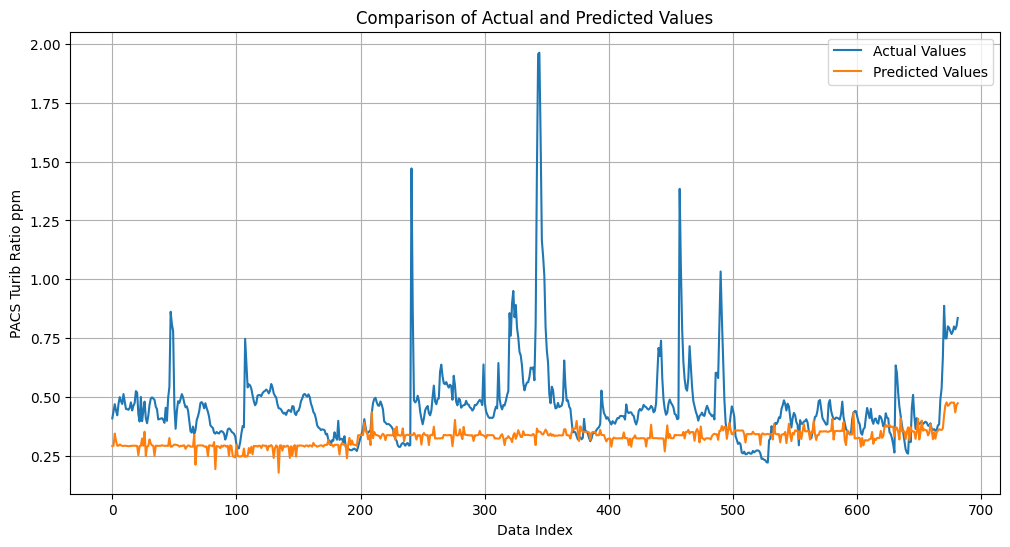

In [ ]:
# 실제값과 예측값의 line plot 그리기
plt.figure(figsize=(12, 6))
# plt.xlim(0, 24)
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.xlabel('Data Index')
plt.ylabel('PACS Turib Ratio ppm')
plt.grid(True)
plt.show()

In [ ]:
df_1

,logTime,창원권_반송(정) 침전수 탁도,창원권_반송(정) 원수 탁도,창원권_반송(정) 원수 pH,창원권_반송(정) 원수 온도,창원권_반송(정) PACS 투입률 ppm,탁도24avg,year,month
0,2013-01-01 01:00:00,0.0588,7.7017,7.6528,2.5044,19.4402,6.7605,2013,1
1,2013-01-01 02:00:00,0.0304,7.2569,7.6505,2.4357,19.2461,6.7412,2013,1
2,2013-01-01 03:00:00,0.0438,6.9190,7.6477,2.6493,19.0985,6.7244,2013,1
3,2013-01-01 04:00:00,0.0926,6.9069,7.6480,2.3842,19.2330,6.6857,2013,1
4,2013-01-01 05:00:00,0.0739,6.7461,7.6477,2.4758,19.5537,6.6408,2013,1
...,...,...,...,...,...,...,...,...,...
84728,2023-08-30 18:00:00,0.7781,31.1396,6.6708,27.5118,101.2770,31.2272,2023,8
84729,2023-08-30 19:00:00,0.7995,31.1010,6.6654,27.5492,101.5306,31.0510,2023,8
84730,2023-08-30 20:00:00,0.7872,30.8281,6.6617,27.5372,88.0135,30.9098,2023,8
84731,2023-08-30 21:00:00,0.8006,30.5719,6.6628,27.5340,98.1480,30.7147,2023,8


In [ ]:
X_1_train

array([[-0.1889018 ,  1.57152841,  0.66360856, ..., -0.21045392,
         0.66800659,  1.07822641],
       [-0.36357988, -0.51153019,  0.29411236, ..., -0.40831347,
        -1.52434758, -0.36285617],
       [-0.55460663, -0.5351796 ,  0.21364009, ..., -0.58202091,
         0.35481314,  1.36644293],
       ...,
       [-0.61305962,  1.7361187 , -1.17008801, ..., -0.6674401 ,
         0.98120004, -1.22750572],
       [ 0.25188644, -0.00796511, -0.9116712 , ...,  0.22111951,
        -0.58476722, -0.93928921],
       [-0.24314435,  0.83242482,  0.70315311, ..., -0.29309971,
        -0.89796067, -0.07463966]])

In [ ]:
new = np.array([19.4402])
new = new.reshape(1,-1)
scaler = StandardScaler()
X_1_train = scaler.fit_transform(X_2_train)
new = scaler.transform(new)
new

array([[19.4402]])

In [ ]:
model1 = keras.models.load_model('침전지탁도예측모델_응집제주입률만.h5')
model1.predict(new)

1/1 [==============================] - 0s 250ms/step


array([[0.8865327]], dtype=float32)